Fetching data for latitude=38.42, longitude=27.14...
First 5 rows of the daily dataset:


,temperature,precipitation,humidity,wind_speed
date,,,,
2010-01-01,16.12,0.00,91.41,5.95
2010-01-02,14.58,0.93,73.89,5.38
2010-01-03,12.74,1.19,73.84,3.79
2010-01-04,5.70,0.07,73.85,3.13
2010-01-05,6.39,0.00,65.34,2.23


Number of missing values per column:
temperature      0
precipitation    0
humidity         0
wind_speed       0
dtype: int64


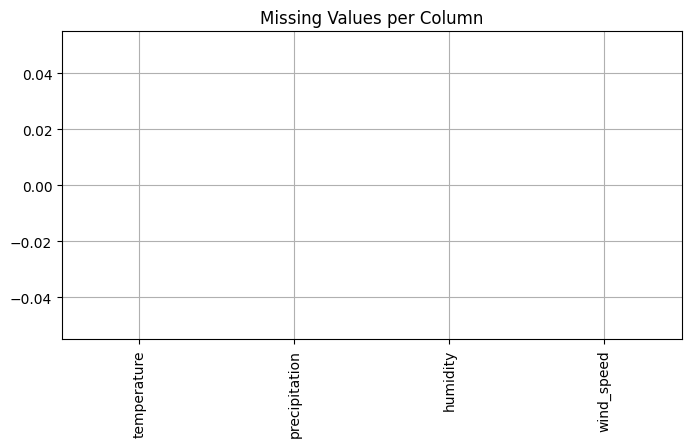

First 5 rows of the monthly dataset:


/tmp/ipython-input-4117980948.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_filled.resample('M').mean()


,temperature,precipitation,humidity,wind_speed
date,,,,
2010-01-31,9.031613,4.976129,83.182581,3.847742
2010-02-28,11.111429,7.695714,80.303929,3.842857
2010-03-31,11.609032,0.740323,75.199032,2.953548
2010-04-30,15.071000,0.781000,71.565000,2.762000
2010-05-31,19.916129,1.430968,65.025161,2.084516


Files have been saved to ./data/:
- weather_daily.csv
- weather_monthly.csv


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Izmir coordinates
latitude = 38.42
longitude = 27.14
start_date = "2010-01-01"
end_date = "2025-07-30"
parameters = ["T2M", "PRECTOTCORR", "RH2M", "WS2M"]

# API Request
def fetch_nasa_power_data(lat, lon, start, end):
    url = (
        "https://power.larc.nasa.gov/api/temporal/daily/point?"
        f"parameters={','.join(parameters)}"
        f"&community=AG&longitude={lon}&latitude={lat}"
        f"&start={start.replace('-', '')}&end={end.replace('-', '')}"
        "&format=JSON"
    )
    print(f"Fetching data for latitude={lat}, longitude={lon}...")
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception("API request failed:", response.text)

    raw = response.json()["properties"]["parameter"]

    df = pd.DataFrame({
        "date": list(raw["T2M"].keys()),
        "temperature": list(raw["T2M"].values()),
        "precipitation": list(raw["PRECTOTCORR"].values()),
        "humidity": list(raw["RH2M"].values()),
        "wind_speed": list(raw["WS2M"].values())
    })
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    return df

# Fetch daily data
df_daily = fetch_nasa_power_data(latitude, longitude, start_date, end_date)

# Preview first rows
print("First 5 rows of the daily dataset:")
display(df_daily.head())

# Check for missing values
print("Number of missing values per column:")
print(df_daily.isna().sum())
df_daily.isna().sum().plot(kind='bar', title="Missing Values per Column", figsize=(8, 4))
plt.grid(True)
plt.show()

# Fill Missing Values
df_filled = df_daily.interpolate(method='time')

# Aggregate to Monthly Averages
df_monthly = df_filled.resample('M').mean()
print("First 5 rows of the monthly dataset:")
display(df_monthly.head())

# Export to CSV
os.makedirs("./data", exist_ok=True)
df_daily.to_csv("./data/weather_daily.csv")
df_monthly.to_csv("./data/weather_monthly.csv")

print("Files have been saved to ./data/:")
print("- weather_daily.csv")
print("- weather_monthly.csv")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 499ms/step - loss: 0.3576 - val_loss: 0.3334
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2892 - val_loss: 0.2818
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2575 - val_loss: 0.2345
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2340 - val_loss: 0.1856
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1752 - val_loss: 0.1354
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1309 - val_loss: 0.0919
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0935 - val_loss: 0.0878
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0882 - val_loss: 0.0848
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0844 - val_loss: 0.0794
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0836 - val_loss: 0.0779
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0811 - val_loss: 0.0751
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0738 - val_l

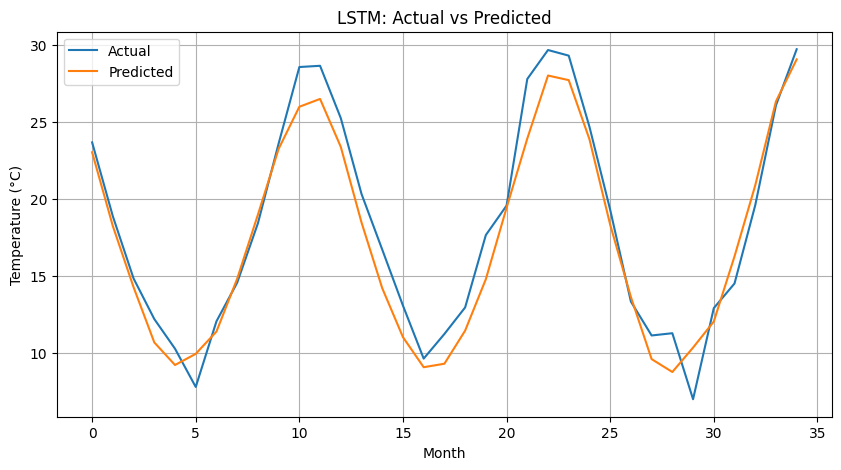

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

/tmp/ipython-input-2042219806.py:105: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=36, freq="M")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

# Load and View Data
df = pd.read_csv("./data/weather_monthly.csv", parse_dates=['date'])
df.set_index("date", inplace=True)
temperature = df['temperature'].values.reshape(-1, 1)

# Normalize (Min-Max)
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(temperature)


# Create LSTM Input Format
def create_lstm_dataset(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_lstm_dataset(temperature_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM input shape


# Train/Test Split (80/20)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


# Build and Train LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, verbose=1
)


# Prediction and Evaluation on Test Set
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Error Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
smape = symmetric_mean_absolute_percentage_error(y_test_inv, y_pred_inv)

# Print Results
print(f"MAE:   {mae:.2f} °C")
print(f"RMSE:  {rmse:.2f} °C")
print(f"MAPE:  {mape:.2f} %")
print(f"SMAPE: {smape:.2f} %")


# Plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("LSTM: Actual vs Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
os.makedirs("./results/plots", exist_ok=True)
plt.savefig("./results/plots/lstm_vs_true.png")
plt.show()


# Forecast for Next 36 Months
future_input = temperature_scaled[-window_size:].copy()
future_forecast = []

for _ in range(36):
    pred = model.predict(future_input.reshape(1, window_size, 1))[0][0]
    future_forecast.append(pred)
    future_input = np.append(future_input[1:], pred)

future_forecast_inv = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))


# Save Forecast and Metrics
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=36, freq="M")
forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_temperature": future_forecast_inv.flatten()
})
os.makedirs("./results", exist_ok=True)
forecast_df.to_csv("./results/lstm_forecast.csv", index=False)

# Save metrics as a separate CSV
metrics_df = pd.DataFrame({
    "MAE": [mae],
    "RMSE": [rmse],
    "MAPE": [mape],
    "SMAPE": [smape]
})
metrics_df.to_csv("./results/lstm_metrics.csv", index=False)

print("36-month forecast saved to ./results/lstm_forecast.csv")
print("Evaluation metrics saved to ./results/lstm_metrics.csv")


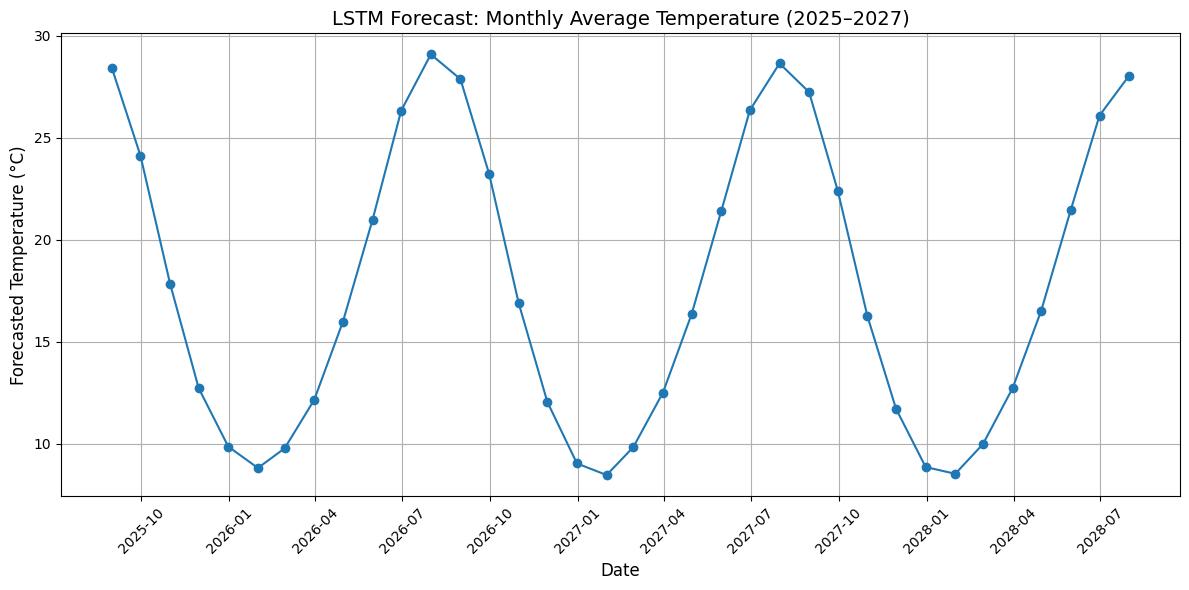

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the forecast file
forecast_df = pd.read_csv("./results/lstm_forecast.csv", parse_dates=["date"])

# Ensure the forecast_temperature column is a 1D float array
forecast_df["forecast_temperature"] = forecast_df["forecast_temperature"].astype(float)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(
    forecast_df["date"].values,
    forecast_df["forecast_temperature"].values,
    marker='o', linestyle='-'
)

# Plot settings
plt.title("LSTM Forecast: Monthly Average Temperature (2025–2027)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Forecasted Temperature (°C)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.tight_layout()

# Save and display the figure
plt.savefig("./results/plots/lstm_future_forecast.png")
plt.show()

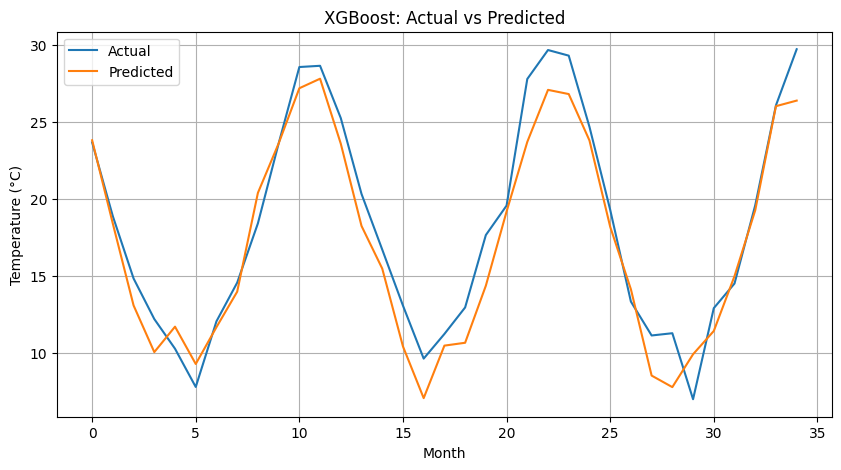

XGBoost 36-month forecast saved to ./results/xgboost_forecast.csv
Evaluation metrics saved to ./results/xgboost_metrics.csv


/tmp/ipython-input-2458465609.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["date"].iloc[-1] + pd.DateOffset(months=1), periods=36, freq="M")


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv("./data/weather_monthly.csv", parse_dates=["date"])
df["month"] = df["date"].dt.month
temperature = df["temperature"].values

# Create features and target
def create_xgb_features(data, months, window_size=12):
    X, y = [], []
    for i in range(window_size, len(data)):
        past_values = data[i-window_size:i]
        current_month = months[i]
        features = np.append(past_values, current_month)
        X.append(features)
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_xgb_features(temperature, df["month"].values, window_size=12)

# Train/test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# Plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
os.makedirs("./results/plots", exist_ok=True)
plt.savefig("./results/plots/xgboost_vs_true.png")
plt.show()

# Forecast next 36 months
last_input = list(temperature[-12:])
last_month = df["month"].iloc[-1]
future_forecast = []

for i in range(36):
    month = (last_month + i) % 12
    month = 12 if month == 0 else month
    features = np.append(last_input[-12:], month)
    pred = model.predict([features])[0]
    future_forecast.append(pred)
    last_input.append(pred)

future_dates = pd.date_range(start=df["date"].iloc[-1] + pd.DateOffset(months=1), periods=36, freq="M")
forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_temperature": future_forecast
})

# Save forecast and metrics
os.makedirs("./results", exist_ok=True)
forecast_df.to_csv("./results/xgboost_forecast.csv", index=False)

metrics_df = pd.DataFrame({
    "MAE": [mae],
    "RMSE": [rmse],
    "MAPE": [mape],
    "SMAPE": [smape]
})
metrics_df.to_csv("./results/xgboost_metrics.csv", index=False)

print("XGBoost 36-month forecast saved to ./results/xgboost_forecast.csv")
print("Evaluation metrics saved to ./results/xgboost_metrics.csv")


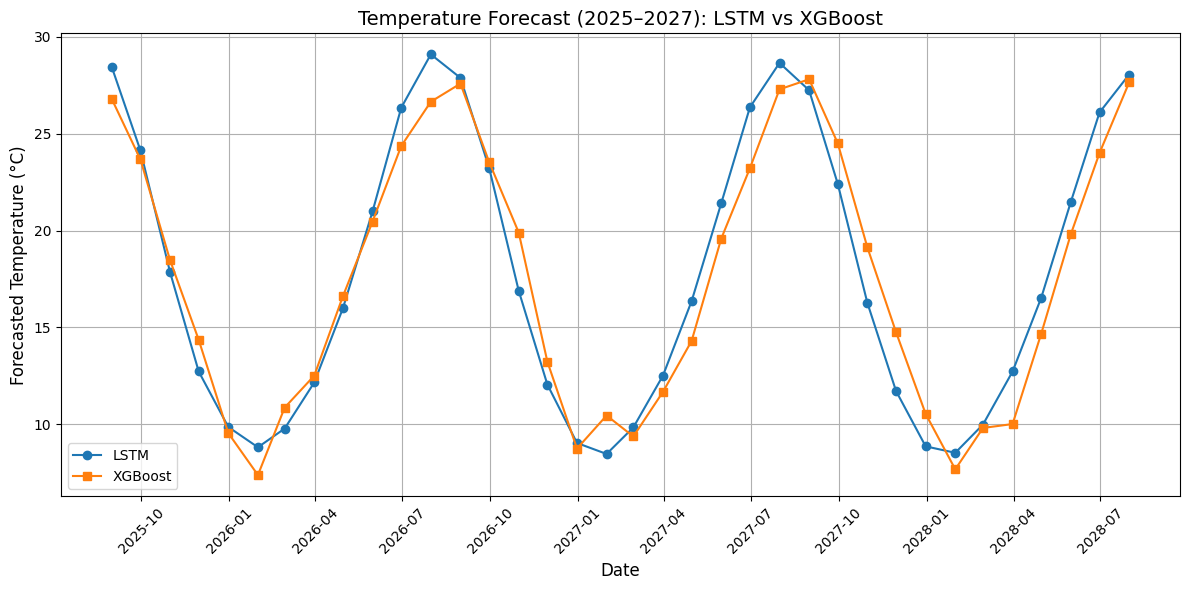

In [6]:
# Forecast Comparison: LSTM vs XGBoost
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Load forecast data
lstm_df = pd.read_csv("./results/lstm_forecast.csv", parse_dates=["date"])
xgb_df = pd.read_csv("./results/xgboost_forecast.csv", parse_dates=["date"])

# Extract columns as 1D numpy arrays
lstm_dates = lstm_df["date"].values.ravel()
lstm_temp = lstm_df["forecast_temperature"].values.ravel()

xgb_dates = xgb_df["date"].values.ravel()
xgb_temp = xgb_df["forecast_temperature"].values.ravel()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(lstm_dates, lstm_temp, label="LSTM", marker='o')
plt.plot(xgb_dates, xgb_temp, label="XGBoost", marker='s')

# Formatting
plt.title("Temperature Forecast (2025–2027): LSTM vs XGBoost", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Forecasted Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.tight_layout()

# Save and display
os.makedirs("./results/plots", exist_ok=True)
plt.savefig("./results/plots/lstm_vs_xgboost_forecast.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/tmp/ipython-input-3827195443.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=36, freq="M")


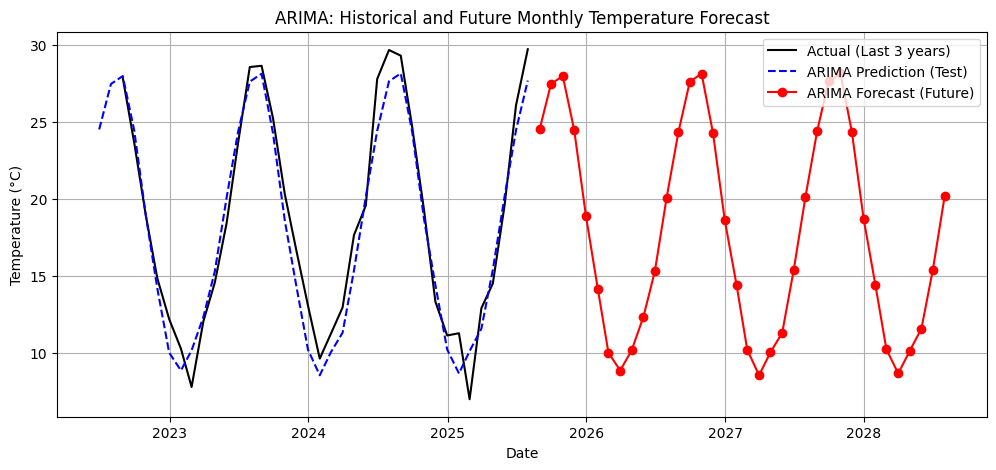

ARIMA 36-month forecast saved to ./results/arima_forecast.csv
Evaluation metrics saved to ./results/arima_metrics.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and prepare data
df = pd.read_csv("./data/weather_monthly.csv", parse_dates=["date"])
df.set_index("date", inplace=True)
temperature = df["temperature"]

# Train/test split (80/20)
train_size = int(len(temperature) * 0.8)
train_data = temperature[:train_size]
test_data = temperature[train_size:]

# Fit ARIMA model (manual order)
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()

# Predict on test set
test_pred = fitted_model.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    typ="levels"
)
test_pred.index = test_data.index

# Forecast next 36 months
future_forecast = fitted_model.forecast(steps=36)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=36, freq="M")
future_forecast = pd.Series(future_forecast.values, index=future_dates)

# Plot actual, test and future forecast
y_series = pd.Series(temperature.values, index=temperature.index)

plt.figure(figsize=(12, 5))

plt.plot(y_series.index[-36:], y_series.values[-36:], label="Actual (Last 3 years)", color='black')
plt.plot(test_data.index, test_pred.values, label="ARIMA Prediction (Test)", linestyle='--', color='blue')
plt.plot(future_dates, future_forecast.values, label="ARIMA Forecast (Future)", marker='o', color='red')

plt.title("ARIMA: Historical and Future Monthly Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)

os.makedirs("./results/plots", exist_ok=True)
plt.savefig("./results/plots/arima_forecast_vs_true.png")
plt.show()

# Save forecast and evaluation metrics
os.makedirs("./results", exist_ok=True)

forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_temperature": future_forecast.values
})
forecast_df.to_csv("./results/arima_forecast.csv", index=False)

# Error metrics on test
mae = mean_absolute_error(test_data, test_pred)
rmse = np.sqrt(mean_squared_error(test_data, test_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

mape = mean_absolute_percentage_error(test_data, test_pred)
smape = symmetric_mean_absolute_percentage_error(test_data, test_pred)

metrics_df = pd.DataFrame({
    "MAE": [mae],
    "RMSE": [rmse],
    "MAPE": [mape],
    "SMAPE": [smape]
})
metrics_df.to_csv("./results/arima_metrics.csv", index=False)

print("ARIMA 36-month forecast saved to ./results/arima_forecast.csv")
print("Evaluation metrics saved to ./results/arima_metrics.csv")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilbkqfst/w373yvxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilbkqfst/3sdsimxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36249', 'data', 'file=/tmp/tmpilbkqfst/w373yvxb.json', 'init=/tmp/tmpilbkqfst/3sdsimxb.json', 'output', 'file=/tmp/tmpilbkqfst/prophet_modelgi1h4qvd/prophet_model-20250806105054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

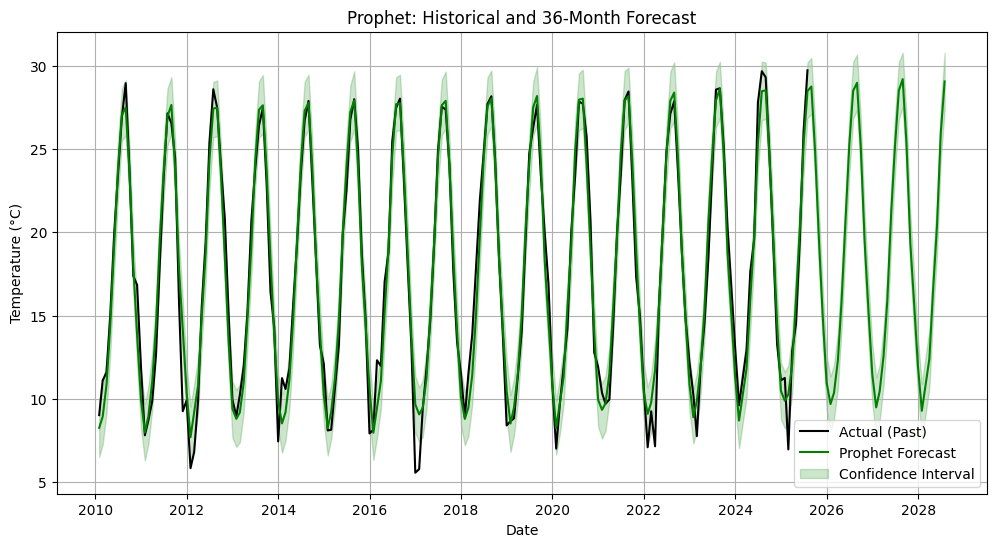

Prophet forecast saved to ./results/prophet_forecast.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from prophet import Prophet

# Load monthly temperature dataset
df = pd.read_csv("./data/weather_monthly.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

# Prepare data for Prophet
prophet_df = df.reset_index()[['date', 'temperature']].rename(columns={'date': 'ds', 'temperature': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Forecast the next 36 months
future = model.make_future_dataframe(periods=36, freq='M')  # 'M' means end of month
forecast = model.predict(future)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual (Past)', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Prophet: Historical and 36-Month Forecast")
plt.legend()
plt.grid(True)

# Save the forecast plot
os.makedirs("./results/plots", exist_ok=True)
plt.savefig("./results/plots/prophet_forecast.png")
plt.show()

# Save last 36-month forecast values
forecast[['ds', 'yhat']].tail(36).to_csv("./results/prophet_forecast.csv", index=False)
print("Prophet forecast saved to ./results/prophet_forecast.csv")

In [8]:
import ee
import pandas as pd
import numpy as np
import requests
import random

# Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-umutyyldz')

# Coordinates and date range
LAT, LON = 38.42, 27.14
POINT = ee.Geometry.Point([LON, LAT])
START_DATE = "2010-01-01"
END_DATE = "2025-07-31"

# Fetch GRACE Groundwater data
def fetch_grace_data():
    collection = ee.ImageCollection("NASA/GRACE/MASS_GRIDS/LAND").select("lwe_thickness_csr")
    filtered = collection.filterDate(START_DATE, END_DATE)

    def extract(image):
        date = image.date().format("YYYY-MM")
        value = image.reduceRegion(ee.Reducer.mean(), POINT, scale=100000).get("lwe_thickness_csr")
        return ee.Feature(None, {"date": date, "groundwater": value})

    features = filtered.map(extract).getInfo()["features"]
    records = [
        {"date": f["properties"]["date"], "groundwater": f["properties"]["groundwater"]}
        for f in features if f["properties"].get("groundwater") is not None
    ]
    df = pd.DataFrame(records)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    df = df.resample("M").mean()
    print("GRACE data fetched and processed:", df)
    return df

# Fetch SMAP Soil Moisture data
def fetch_soil_moisture_data():
    collection = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture").select("ssm")
    filtered = collection.filterDate(START_DATE, END_DATE)

    def extract(image):
        date = image.date().format("YYYY-MM")
        value = image.reduceRegion(ee.Reducer.mean(), POINT, scale=10000).get("ssm")
        return ee.Feature(None, {"date": date, "soil_moisture": value})

    features = filtered.map(extract).getInfo()["features"]
    records = [
        {"date": f["properties"]["date"], "soil_moisture": f["properties"]["soil_moisture"]}
        for f in features if f["properties"].get("soil_moisture") is not None
    ]
    df = pd.DataFrame(records)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)
    df = df.resample("M").mean()
    return df

# Fetch NASA POWER temperature and precipitation data
def fetch_nasa_power_data():
    params = {
        "latitude": LAT,
        "longitude": LON,
        "start": "2010",
        "end": "2025",
        "parameters": "T2M,PRECTOT",
        "community": "AG",
        "format": "JSON"
    }
    url = "https://power.larc.nasa.gov/api/temporal/monthly/point"
    response = requests.get(url, params=params)
    data = response.json()

    parameters = data["properties"]["parameter"]
    t2m = parameters.get("T2M", {})
    prec = parameters.get("PRECTOTCORR", {})

    common_keys = sorted(set(t2m.keys()) & set(prec.keys()))

    records = []
    for k in common_keys:
        try:
            year = int(k[:4])
            month = int(k[4:])
            date = pd.Timestamp(year=year, month=month, day=1)
            records.append({
                "date": date,
                "temperature": t2m[k],
                "precipitation": prec[k]
            })
        except Exception as e:
            print(f"Invalid date encountered: {e}")

    df = pd.DataFrame(records)
    df.set_index("date", inplace=True)
    return df

# Fill missing values with random values between column min and max
def random_fill(df, start="2010-01-01", end="2025-07-31"):
    df.index = pd.to_datetime(df.index)
    full_index = pd.date_range(start=start, end=end, freq="MS")
    df = df.reindex(full_index.union(df.index)).sort_index()
    df.replace(-999.0, np.nan, inplace=True)

    for col in df.columns:
        col_min = df[col].min(skipna=True)
        col_max = df[col].max(skipna=True)
        null_indices = df[df[col].isnull()].index
        if not np.isnan(col_min) and not np.isnan(col_max):
            df.loc[null_indices, col] = [random.uniform(col_min, col_max) for _ in range(len(null_indices))]

    df.index.name = "date"
    return df

# Main processing block
def main():
    df_grace = fetch_grace_data()
    df_soil = fetch_soil_moisture_data()
    df_power = fetch_nasa_power_data()

    df_grace_filled = random_fill(df_grace)
    df_soil_filled = random_fill(df_soil)
    df_power_filled = random_fill(df_power)

    def monthly_mean(df):
        df = df.copy()
        df["year_month"] = df.index.to_period("M")
        return df.groupby("year_month").mean().reset_index().rename(columns={"year_month": "date"}).set_index("date")

    df_grace_grouped = monthly_mean(df_grace_filled)
    df_soil_grouped = monthly_mean(df_soil_filled)
    df_power_grouped = monthly_mean(df_power_filled)

    df_merged = pd.concat([df_grace_grouped, df_soil_grouped, df_power_grouped], axis=1)

    df_merged_filled = random_fill(df_merged.copy().rename_axis("date").reset_index().set_index("date").to_timestamp())
    print("\nMERGED AND FILLED DATA:")
    print(df_merged_filled.tail())
    return df_merged_filled


In [9]:
df_merged_filled = main()
df = df_merged_filled.copy()

/usr/local/lib/python3.11/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for NASA/GRACE/MASS_GRIDS/LAND! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/NASA_GRACE_MASS_GRIDS_LAND

  warnings.warn(warning, category=DeprecationWarning)
/tmp/ipython-input-2977756400.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()
/usr/local/lib/python3.11/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for NASA_USDA/HSL/SMAP10KM_soil_moisture! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture

  warnings.warn(warning, category=DeprecationWarning)


GRACE data fetched and processed:             groundwater
date                   
2010-01-31     9.404194
2010-02-28    11.646175
2010-03-31    11.858406
2010-04-30     7.330070
2010-05-31     5.173134
...                 ...
2016-09-30          NaN
2016-10-31          NaN
2016-11-30    -0.720056
2016-12-31    -5.785612
2017-01-31     3.335456

[85 rows x 1 columns]


/tmp/ipython-input-2977756400.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()


Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12
Invalid date encountered: month must be in 1..12

MERGED AND FILLED DATA:
            groundwater  soil_moisture  temperature  precipitation
date                                                              
2025-08-01     8.481810      12.388118    20.919883      

In [10]:
df

,groundwater,soil_moisture,temperature,precipitation
date,,,,
2010-01-01,2.669081,24.392321,9.030000,4.980000
2010-02-01,5.137645,7.942577,11.110000,7.700000
2010-03-01,4.679060,16.070639,11.610000,0.740000
2010-04-01,3.492101,10.167830,15.070000,0.780000
2010-05-01,4.116859,12.025968,19.920000,1.430000
...,...,...,...,...
2025-08-01,8.481810,12.388118,20.919883,6.042784
2025-09-01,3.181167,24.621807,29.160118,6.880783
2025-10-01,-0.116180,20.401525,13.003926,7.437968



 Classification Report:
              precision    recall  f1-score   support

         low       0.92      1.00      0.96        23
      medium       0.80      0.80      0.80        10
        high       1.00      0.67      0.80         6

    accuracy                           0.90        39
   macro avg       0.91      0.82      0.85        39
weighted avg       0.90      0.90      0.89        39



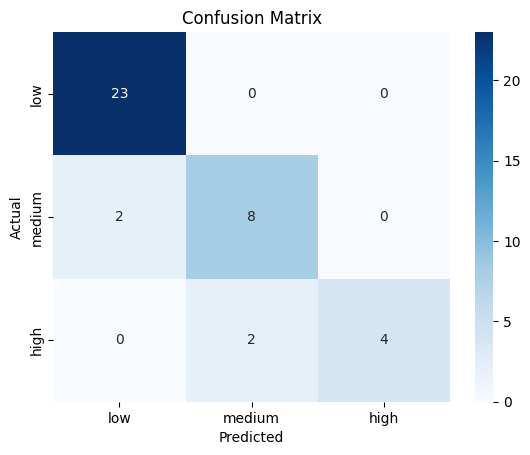

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df

# Label water risk level based on feature thresholds
def label_risk(row):
    score = 0
    if row['groundwater'] < df['groundwater'].quantile(0.25): score += 1
    if row['soil_moisture'] < df['soil_moisture'].quantile(0.25): score += 1
    if row['precipitation'] < df['precipitation'].quantile(0.25): score += 1
    if row['temperature'] > df['temperature'].quantile(0.75): score += 1

    if score >= 3:
        return "high"
    elif score == 2:
        return "medium"
    else:
        return "low"

df['water_risk'] = df.apply(label_risk, axis=1)

X = df[['groundwater', 'soil_moisture', 'precipitation', 'temperature']]
y = df['water_risk']
y_encoded = y.map({'low': 0, 'medium': 1, 'high': 2})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Random Forest classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


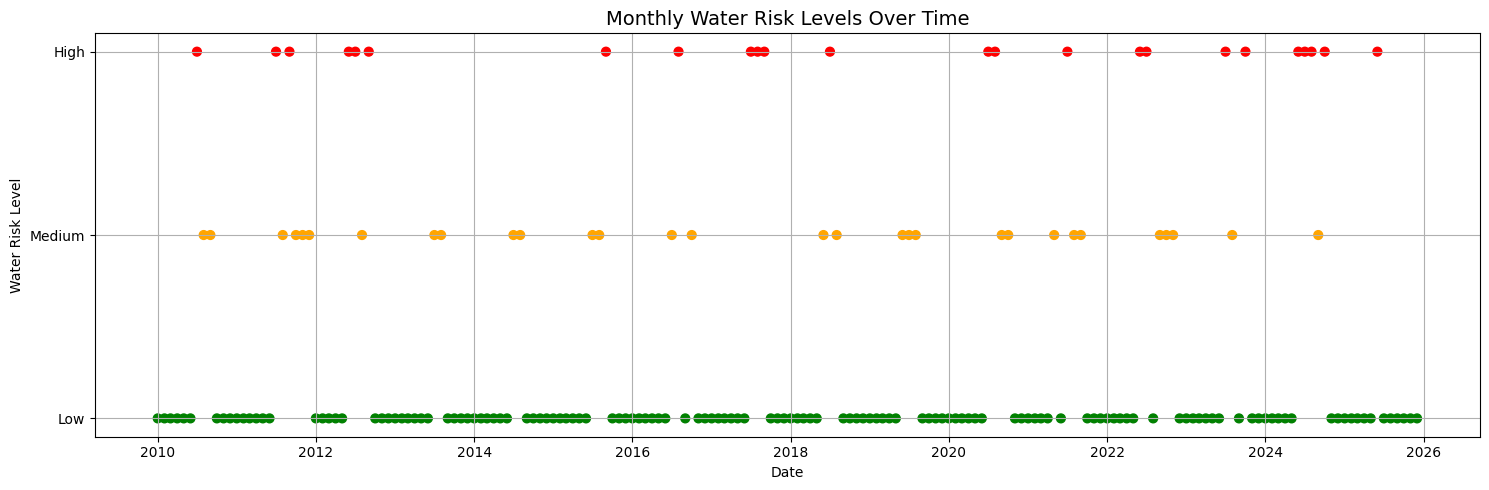

In [13]:
import matplotlib.pyplot as plt

# Convert water risk levels to numeric values
df_plot = df.copy()
df_plot["risk_level_num"] = df_plot["water_risk"].map({"low": 0, "medium": 1, "high": 2})

# Define color map for risk levels
color_map = {0: "green", 1: "orange", 2: "red"}

# Plot risk levels over time
plt.figure(figsize=(15, 5))
plt.scatter(df_plot.index, df_plot["risk_level_num"],
            c=df_plot["risk_level_num"].map(color_map),
            label="Water Risk", s=40)

# Set axis labels and styling
plt.yticks([0, 1, 2], labels=["Low", "Medium", "High"])
plt.title("Monthly Water Risk Levels Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Water Risk Level")
plt.grid(True)
plt.tight_layout()
plt.show()


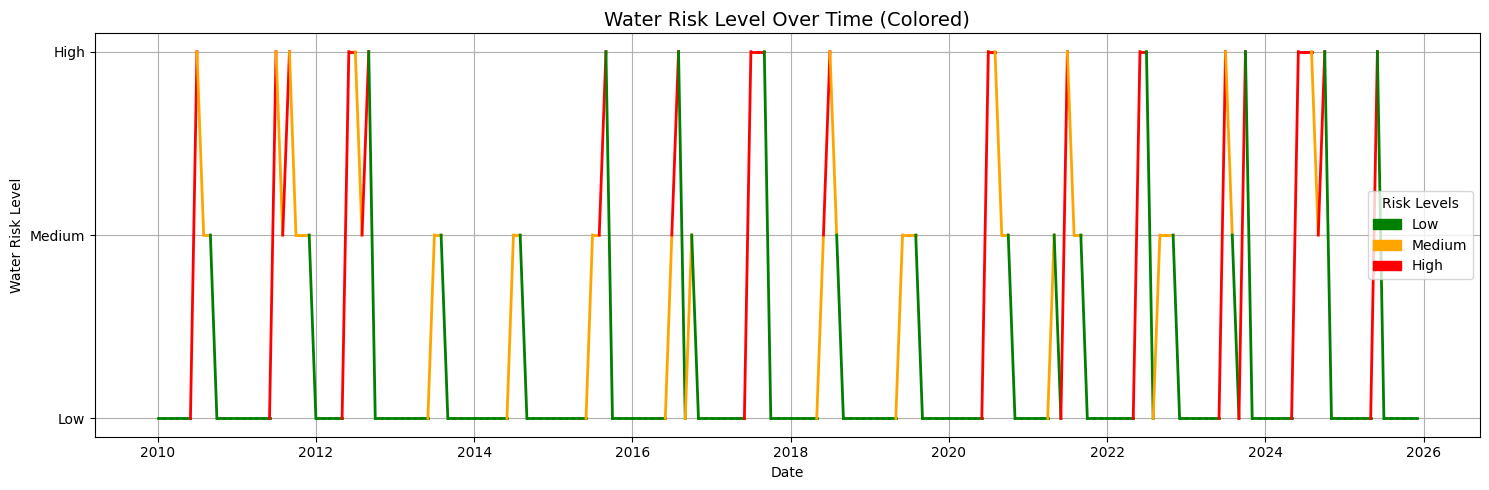

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Add numerical values for water risk levels
df_line = df.copy()
df_line["risk_level_num"] = df_line["water_risk"].map({"low": 0, "medium": 1, "high": 2})
df_line = df_line.sort_index()

# Define color map for risk levels
risk_colors = {0: "green", 1: "orange", 2: "red"}

# Plot water risk levels as a colored line over time
plt.figure(figsize=(15, 5))

# Draw each segment with the color corresponding to the new point
for i in range(1, len(df_line)):
    x0, x1 = df_line.index[i - 1], df_line.index[i]
    y0, y1 = df_line["risk_level_num"].iloc[i - 1], df_line["risk_level_num"].iloc[i]
    color = risk_colors[y1]
    plt.plot([x0, x1], [y0, y1], color=color, linewidth=2)

# Set plot title, labels, and style
plt.title("Water Risk Level Over Time (Colored)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Water Risk Level")
plt.yticks([0, 1, 2], labels=["Low", "Medium", "High"])
plt.grid(True)

# Add legend for risk levels
legend_patches = [
    mpatches.Patch(color="green", label="Low"),
    mpatches.Patch(color="orange", label="Medium"),
    mpatches.Patch(color="red", label="High")
]
plt.legend(handles=legend_patches, title="Risk Levels")

plt.tight_layout()
plt.show()


In [15]:
df[["groundwater", "soil_moisture", "precipitation", "temperature", "water_risk"]].to_csv("su_riski_ozet.csv")